<a href="https://colab.research.google.com/github/guptamols/zero_to_hero_nn/blob/till_29_30_video/micro_grad_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### References
https://github.com/AayushSameerShah/Neural-Net-Zero-to-Hero-with-Andrej

https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b

https://medium.com/@0ssamaak0/how-open-ais-andrej-karpathy-made-one-of-the-best-tutorials-in-deep-learning-e6b6445a2d05

https://github.com/karpathy/nn-zero-to-hero/tree/master

https://colab.research.google.com/drive/11SbzRCfRAXyveiri8CJ7Bjbn4MfiyvsL#scrollTo=yk3QDMPjWyYp

https://github.com/Anri-Lombard/micrograd

In [1]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [2]:
import os
os.chdir('gdrive/MyDrive/zero_to_hero_nn/zero_to_hero_nn')

In [3]:
! pwd

/content/gdrive/MyDrive/zero_to_hero_nn/zero_to_hero_nn


Neural Network has inputs and weights. These inputs and weights are multiplied and then added through complicated layers.

To implement this Karpathy is demonstrating building a Value object which basically is a data structure / mathematical expression that:
- How the output was constructured. What made what
- Which operations made what e.g. * / + / tanh / sigmoid etc
- Also calculate the derivatives of the weights so that we know how much the weights need to be changed

The nn.py has 4 classes: class Module, Neuron, Layer, MLP

In [20]:
class Value:

    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label=label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self,other):
        out = Value(self.data + other.data, (self,other),'+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other),'*')
        return out


a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10,label='c')
e = a *b ; e.label='e'
d = e+c; d.label='d'
f=Value(-2.0,label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

In [5]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [6]:
d._op

'+'

In [7]:
def build(v):
    nodes=set();edges=set()
    def traversal(v):
        #print(v) # just for demo how each node is travelled to.
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                traversal(child)
    traversal(v)
    return nodes,edges

# Good example of travelling a chain.
# Please note that traversal is called inside build & there is a recursion inside traversal also. So it travels from one node to another
# why did we not build traversal outside ?
# 1. It helps not define nodes and edges variable and return them again. So it simplifies the code

In [8]:
nodes,edges=build(d)
print(f"nodes:{nodes}")
print(f"edges:{edges}")

nodes:{Value(data=2.0), Value(data=-6.0), Value(data=-3.0), Value(data=10), Value(data=4.0)}
edges:{(Value(data=10), Value(data=4.0)), (Value(data=-6.0), Value(data=4.0)), (Value(data=-3.0), Value(data=-6.0)), (Value(data=2.0), Value(data=-6.0))}


A little Intro to Digraph (Working Knowledge)

In [9]:
from graphviz import Digraph

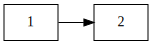

In [10]:
dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})

dot.node(name='1',label='1',shape='record')
dot.node(name='2',label='2',shape='record')
dot.edge('1','2') # from and to
dot

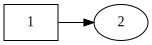

In [11]:
# If you would not have created '2' above then too it would be created but with a default shape

dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})

dot.node(name='1',label='1',shape='record')
dot.edge('1','2') # from and to.
dot

In [16]:
def draw_dot(exp_graph):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = build(exp_graph)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{data %.4f}" % (n.data), shape='record')
    dot.node(name = uid, label = f"{n.label}|data:{n.data:.4f}", shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

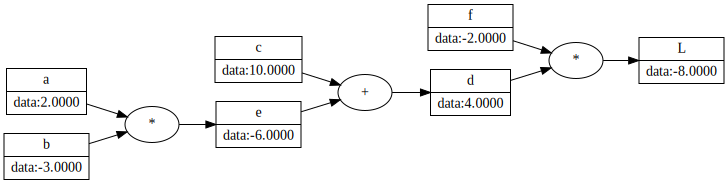

In [21]:
draw_dot(L)